<a href="https://colab.research.google.com/github/afvallejo/SIG/blob/master/1_Notebook_From_fastq_to_matrix_v0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

- Bray, N. L., Pimentel, H., Melsted, P., & Pachter, L. (2016). Near-optimal probabilistic RNA-seq quantification. Nature biotechnology, 34(5), 525-527.[link text](https://www.nature.com/articles/nbt.3519?report=reader)

- Ewels, P., Magnusson, M., Lundin, S., & Käller, M. (2016). MultiQC: summarize analysis results for multiple tools and samples in a single report. Bioinformatics, 32(19), 3047-3048.[link text](https://academic.oup.com/bioinformatics/article/32/19/3047/2196507)

- Pimentel, H., Bray, N. L., Puente, S., Melsted, P., & Pachter, L. (2017). Differential analysis of RNA-seq incorporating quantification uncertainty. Nature methods, 14(7), 687.[link text](https://www.nature.com/articles/nmeth.4324)

# Install packages

In [0]:
pip install --upgrade rpy2

In [0]:
!wget https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_linux-v0.46.1.tar.gz

In [0]:
!tar -xf kallisto_linux-v0.46.1.tar.gz

In [0]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip

In [0]:
!unzip fastqc_v0.11.9.zip

In [0]:
!chmod +x FastQC/fastqc

In [0]:
!pip install multiqc

# Get the cDNA file

In [0]:
!wget ftp://ftp.ensembl.org/pub/release-95/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz

In [0]:
!kallisto/kallisto index --make-unique -i kallisto_index.idx Homo_sapiens.GRCh38.cdna.all.fa.gz

In [0]:
!Rscript -e "options(Ncpus = 4)" -e "install.packages('devtools')" -e "install.packages('BiocManager')" -e "BiocManager::install(c('tximport','biomaRt', 'dplyr', 'tidyverse','ensembldb','EnsDb.Hsapiens.v86','rhdf5','rhdf5','genefilter'))" -e "devtools::install_github('pachterlab/sleuth')"

In [0]:
!Rscript -e "BiocManager::install('genefilter')"

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)
Installing package(s) 'genefilter'
also installing the dependency ‘annotate’

trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/annotate_1.64.0.tar.gz'
Content type 'application/x-gzip' length 1873132 bytes (1.8 MB)
downloaded 1.8 MB

trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/genefilter_1.68.0.tar.gz'
Content type 'application/x-gzip' length 1421076 bytes (1.4 MB)
downloaded 1.4 MB

* installing *source* package ‘annotate’ ...
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (annotate)
* installing *source* package ‘g

# Creating folder structure

In [0]:
!mkdir fastq
!mkdir kalisto_results

mkdir: cannot create directory ‘fastq’: File exists


In [0]:
%cd fastq 

/content/fastq


# Download sample fastq files

Sample1


In [0]:
!wget -P sample1/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/000/SRR6914400/SRR6914400_1.fastq.gz
!wget -P sample1/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/000/SRR6914400/SRR6914400_2.fastq.gz

--2020-05-12 14:45:53--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/000/SRR6914400/SRR6914400_1.fastq.gz
           => ‘sample1/SRR6914400_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR691/000/SRR6914400 ... done.
==> SIZE SRR6914400_1.fastq.gz ... 157464193
==> PASV ... done.    ==> RETR SRR6914400_1.fastq.gz ... done.
Length: 157464193 (150M) (unauthoritative)

SRR6914400_1.fastq. 100%[===================>] 150.17M  7.21MB/s    in 18s     

2020-05-12 14:46:15 (8.29 MB/s) - ‘sample1/SRR6914400_1.fastq.gz’ saved [157464193]

--2020-05-12 14:46:17--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/000/SRR6914400/SRR6914400_2.fastq.gz
           => ‘sample1/SRR6914400_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting 

Sample2

In [0]:
!wget -P sample2/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/001/SRR6914401/SRR6914401_1.fastq.gz
!wget -P sample2/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/001/SRR6914401/SRR6914401_2.fastq.gz

--2020-05-12 14:46:50--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/001/SRR6914401/SRR6914401_1.fastq.gz
           => ‘sample2/SRR6914401_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR691/001/SRR6914401 ... done.
==> SIZE SRR6914401_1.fastq.gz ... 150135916
==> PASV ... done.    ==> RETR SRR6914401_1.fastq.gz ... done.
Length: 150135916 (143M) (unauthoritative)

SRR6914401_1.fastq. 100%[===================>] 143.18M  11.7MB/s    in 15s     

2020-05-12 14:47:10 (9.41 MB/s) - ‘sample2/SRR6914401_1.fastq.gz’ saved [150135916]

--2020-05-12 14:47:15--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/001/SRR6914401/SRR6914401_2.fastq.gz
           => ‘sample2/SRR6914401_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting 

Sample3


In [0]:
!wget -P sample3/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/002/SRR6914402/SRR6914402_1.fastq.gz
!wget -P sample3/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/002/SRR6914402/SRR6914402_2.fastq.gz

--2020-05-12 14:47:42--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/002/SRR6914402/SRR6914402_1.fastq.gz
           => ‘sample3/SRR6914402_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR691/002/SRR6914402 ... done.
==> SIZE SRR6914402_1.fastq.gz ... 162819206
==> PASV ... done.    ==> RETR SRR6914402_1.fastq.gz ... done.
Length: 162819206 (155M) (unauthoritative)

SRR6914402_1.fastq. 100%[===================>] 155.28M  1.65MB/s    in 75s     

2020-05-12 14:49:00 (2.08 MB/s) - ‘sample3/SRR6914402_1.fastq.gz’ saved [162819206]

--2020-05-12 14:49:02--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/002/SRR6914402/SRR6914402_2.fastq.gz
           => ‘sample3/SRR6914402_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting 

Sample4

In [0]:
!wget -P sample4/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/003/SRR6914403/SRR6914403_1.fastq.gz
!wget -P sample4/ ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/003/SRR6914403/SRR6914403_2.fastq.gz

--2020-05-12 14:49:31--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/003/SRR6914403/SRR6914403_1.fastq.gz
           => ‘sample4/SRR6914403_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR691/003/SRR6914403 ... done.
==> SIZE SRR6914403_1.fastq.gz ... 133773423
==> PASV ... done.    ==> RETR SRR6914403_1.fastq.gz ... done.
Length: 133773423 (128M) (unauthoritative)

SRR6914403_1.fastq. 100%[===================>] 127.58M  7.17MB/s    in 20s     

2020-05-12 14:49:55 (6.38 MB/s) - ‘sample4/SRR6914403_1.fastq.gz’ saved [133773423]

--2020-05-12 14:49:56--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR691/003/SRR6914403/SRR6914403_2.fastq.gz
           => ‘sample4/SRR6914403_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting 

In [0]:
%cd ..

/content


# Alingment 

## Kallisto alignment (compatible with Txtimport)

In [0]:
%%time
%%!
cd fastq
for DIR in $(ls -d */); do
  echo $DIR
  cd $DIR
  seq_file1=*_1.fastq.gz
  seq_file2=*_2.fastq.gz
  base=$(echo $seq_file1|awk '{print substr($0, 1, length()-11)}')
  echo $base
  echo "Running Kallisto with the following code"
  echo "/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalisto_results/$DIR -t 2 $seq_file1 $seq_file2 >>log 2>&1"
  echo $seq_file1
  echo $seq_file2
  /content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalisto_results/$base -t 2 $seq_file1 $seq_file2 >>log 2>&1
  cd ..
done

CPU times: user 551 ms, sys: 87.2 ms, total: 638 ms
Wall time: 4min 13s


['sample1/',
 'SRR6914400',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalisto_results/sample1/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914400_1.fastq.gz',
 'SRR6914400_2.fastq.gz',
 'sample2/',
 'SRR6914401',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalisto_results/sample2/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914401_1.fastq.gz',
 'SRR6914401_2.fastq.gz',
 'sample3/',
 'SRR6914402',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalisto_results/sample3/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914402_1.fastq.gz',
 'SRR6914402_2.fastq.gz',
 'sample4/',
 'SRR6914403',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -o /content/kalis

## Kallisto alignment with -b (required for Sleuth)

In [0]:
%%!
cd fastq
for DIR in $(ls -d */); do
  echo $DIR
  cd $DIR
  seq_file1=*_1.fastq.gz
  seq_file2=*_2.fastq.gz
  base=$(echo $seq_file1|awk '{print substr($0, 1, length()-11)}')
  echo $base
  echo "Running Kallisto with the following code"
  echo "/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -b 50 -o /content/kalisto_results/$DIR -t 2 $seq_file1 $seq_file2 >>log 2>&1"
  echo $seq_file1
  echo $seq_file2
  /content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -b 50 -o /content/kalisto_results/$base -t 2 $seq_file1 $seq_file2 >>log 2>&1
  cd ..
done

['sample1/',
 'SRR6914400',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -b 50 -o /content/kalisto_results/sample1/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914400_1.fastq.gz',
 'SRR6914400_2.fastq.gz',
 'sample2/',
 'SRR6914401',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -b 50 -o /content/kalisto_results/sample2/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914401_1.fastq.gz',
 'SRR6914401_2.fastq.gz',
 'sample3/',
 'SRR6914402',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias -b 50 -o /content/kalisto_results/sample3/ -t 2 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'SRR6914402_1.fastq.gz',
 'SRR6914402_2.fastq.gz',
 'sample4/',
 'SRR6914403',
 'Running Kallisto with the following code',
 '/content/kallisto/kallisto quant -i /content/kallisto_index.idx --bias

# QC

## FastQC

In [0]:
pwd

In [0]:
ls

In [0]:
%%!
cd fastq
for DIR in $(ls -d */); do
  echo $DIR
  cd $DIR
  /content/FastQC/fastqc *.fastq.gz
  cd ..
done

In [0]:
ls

## MultiQC

In [0]:
!multiqc .

# Creating our gene expresssion matrix with R

## Load packages

In [0]:
%load_ext rpy2.ipython

In [0]:
from rpy2.robjects.lib import grdevices

with grdevices.render_to_bytesio(grdevices.png, 
                                 width=300,
                                 height=300, 
                                 res=300) as b:
    result = func(*args, **kwargs) 

from IPython.display import Image, display
data = b.getvalue()
display(Image(data=data, format='png', embed=True))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-ec9bcec9ffa1>", line 7, in <module>
    result = func(*args, **kwargs)
NameError: name 'func' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultra

NameError: ignored

In [0]:
%%R
# Load all the R libraries we will be using in the notebook
library(tximport)
library(biomaRt)
library(Biobase)
library(ggplot2)
library(dplyr)
library(tidyverse) 
library(Biostrings)
library(ensembldb)
library(EnsDb.Hsapiens.v86) 
library(rhdf5)


## Set WD

In [0]:
%%R
setwd("/content/kalisto_results")

R[write to console]: Error in setwd("/content/kalisto_results") : 
  cannot change working directory

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 5 rows containing missing values (geom_point). 




Error in setwd("/content/kalisto_results") : 
  cannot change working directory


## T2G table 

In [0]:
%%R
listTables(EnsDb.Hsapiens.v86)
listColumns(EnsDb.Hsapiens.v86, "tx")
Tx <- transcripts(EnsDb.Hsapiens.v86, columns=c(listColumns(EnsDb.Hsapiens.v86,"tx"), "gene_name"))
Tx <- as_tibble(Tx)
Tx <- dplyr::rename(Tx, target_id = tx_id)
Tx <- dplyr::select(Tx, target_id, gene_name)
print(dim(Tx))
head(Tx)

R[write to console]: Error in listTables(EnsDb.Hsapiens.v86) : 
  could not find function "listTables"




Error in listTables(EnsDb.Hsapiens.v86) : 
  could not find function "listTables"


## Create metadata

In [0]:
%%R
metadata <- matrix(c("sample1","SRR6914400","sample2","SRR6914401","sample3","SRR6914402","sample4","SRR6914403"),ncol=2,byrow=TRUE)
colnames(metadata) <- c("sample","folder")
metadata <- as.data.frame(metadata)
metadata

   sample     folder
1 sample1 SRR6914400
2 sample2 SRR6914401
3 sample3 SRR6914402
4 sample4 SRR6914403


## Upload metadata from csv (Alternative)

In [0]:
metadata<-read.csv("Path to file")

## Check paths

In [0]:
%%R
path <- file.path(metadata$folder, "abundance.h5")
all(file.exists(path)) 

[1] TRUE


## Summary of kallisto quant resuls

In [0]:
%%R
Txi_gene <- tximport(path, 
                     type = "kallisto", 
                     tx2gene = Tx, 
                     txOut = FALSE, #How does the result change if this =FALSE vs =TRUE?
                     countsFromAbundance = "lengthScaledTPM",
                     ignoreTxVersion=TRUE)

colSums(Txi_gene$counts)

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 

R[write to console]: transcripts missing from tx2gene: 9784

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length



[1] 4152834 4136155 4689889 4043707


## Extract information you choose from pseudo-alignment results

In [0]:
%%R
raw.data <- Txi_gene$counts
colnames(raw.data) <- metadata$folder
dim(raw.data)
write.csv(raw.data,file="Data_kallisto_counts.csv")

In [0]:
%%R
head(raw.data)

        SRR6914400 SRR6914401 SRR6914402 SRR6914403
5S_rRNA   0.000000  0.0000000   0.000000   0.000000
A1BG    128.859924  4.2104605 396.445958   1.269421
A1CF      0.000000  3.7558551   0.000000   0.000000
A2M       0.000000  0.0000000   0.000000   0.000000
A2ML1     1.091845  0.9452329   7.273201   0.000000
A2MP1     0.000000  0.0000000   0.000000   0.000000


In [0]:
%%R -o raw_data
raw_data <- Txi_gene$abundance
colnames(raw_data) <- metadata$folder
dim(raw_data)
write.csv(raw_data,file="Data_kallisto_TPM.csv")

In [0]:
%%R
head(raw_data)

         SRR6914400 SRR6914401 SRR6914402 SRR6914403
5S_rRNA  0.00000000 0.00000000    0.00000  0.0000000
A1BG    23.67540528 0.80899392   63.91172  0.2473736
A1CF     0.00000000 0.09277740    0.00000  0.0000000
A2M      0.00000000 0.00000000    0.00000  0.0000000
A2ML1    0.06860954 0.06211528    0.40102  0.0000000
A2MP1    0.00000000 0.00000000    0.00000  0.0000000


# Load the data

In [0]:
%%R
library(tidyverse)
library(reshape2) 
library(genefilter) 
library(edgeR) 
library(matrixStats)
library(cowplot)
library(reshape2) 
library(genefilter)
library(edgeR) 
library(matrixStats)

In [0]:
%%R
library(genefilter) 

R[write to console]: 
Attaching package: 'genefilter'


R[write to console]: The following object is masked from 'package:readr':

    spec




## Examine your data up to this point

In [0]:
%%R
myTPM <- Txi_gene$abundance
myCounts <- Txi_gene$counts
colSums(myTPM)
colSums(myCounts)

[1] 4152834 4136155 4689889 4043707


# capture sample labels from the study design

In [0]:
sampleLabels <- targets$sample

## Generate summary stats for your data ----
- 1st, calculate summary stats for each transcript or gene, and add these to your data matrix
- then use the base R function 'transform' to modify the data matrix (equivalent of Excel's '=')

In [0]:
%%R
myTPM.stats <- transform(myTPM, 
                         SD=rowSds(myTPM), 
                         AVG=rowMeans(myTPM),
                         MED=rowMedians(myTPM))
head(myTPM.stats)

                 X1         X2       X3        X4         SD         AVG
5S_rRNA  0.00000000 0.00000000  0.00000 0.0000000  0.0000000  0.00000000
A1BG    23.67540528 0.80899392 63.91172 0.2473736 29.8972204 22.16087361
A1CF     0.00000000 0.09277740  0.00000 0.0000000  0.0463887  0.02319435
A2M      0.00000000 0.00000000  0.00000 0.0000000  0.0000000  0.00000000
A2ML1    0.06860954 0.06211528  0.40102 0.0000000  0.1813785  0.13293621
A2MP1    0.00000000 0.00000000  0.00000 0.0000000  0.0000000  0.00000000
                MED
5S_rRNA  0.00000000
A1BG    12.24219960
A1CF     0.00000000
A2M      0.00000000
A2ML1    0.06536241
A2MP1    0.00000000


In [0]:
dataf = utils.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv")

In [0]:
%load_ext rpy2.ipython

In [0]:
%%R
install.packages("viridis")
library(viridis)


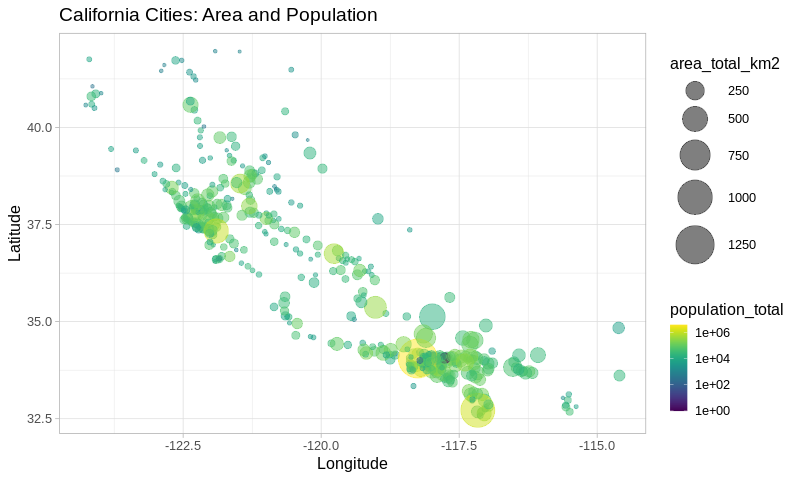

In [0]:
%%R -i dataf -w 800
library(ggplot2)
p <- ggplot(dataf) +
     aes_string(x = 'longd',
                y = 'latd',
                color = 'population_total',
                size = 'area_total_km2') +
     geom_point(alpha = 0.5) +
     scale_x_continuous('Longitude') +
     scale_y_continuous('Latitude') +
     scale_size(range = c(1, 18)) +
     scale_color_viridis(trans='log10') +
     ggtitle('California Cities: Area and Population') +
     theme_light(base_size=16)
print(p)

In [0]:
from rpy2.robjects.packages import importr
utils = importr('utils')

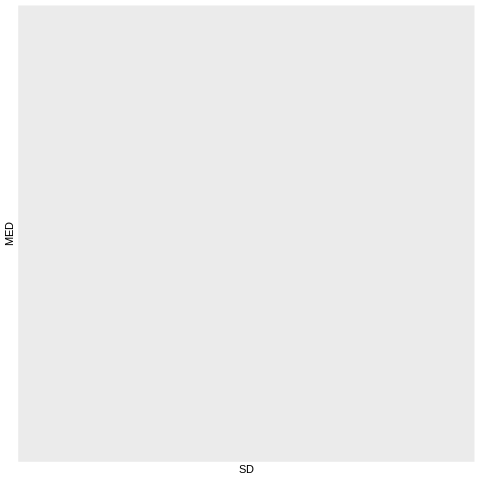

In [0]:
%%R
p<-ggplot(myTPM.stats, aes(x=SD, y=MED)) + geom_hex(shape=16, size=2)

print(p)

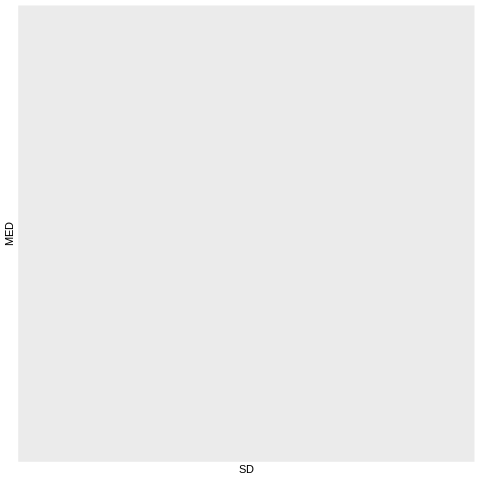

In [0]:
%%R
ggplot(myTPM.stats, aes(x=SD, y=MED)) +
  geom_hex(shape=16, size=2)

In [0]:
%%R
# Make a DGElist from your counts, and plot ----
myDGEList <- DGEList(m
# take a look at the DGEList object 
myDGEList
#DEGList objects are a good R data file to consider saving to you working directory
save(myDGEList, file = "myDGEList")
#Saved DGEList objects can be easily shared and loaded into an R environment
load(file = "myDGEList")

RParsingError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%%R
# use the 'cpm' function from EdgeR to get counts per million
cpm <- cpm(myDGEList) 
colSums(cpm)
log2.cpm <- cpm(myDGEList, log=TRUE)

R[write to console]: Error in cpm(myDGEList) : could not find function "cpm"

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ignoring unknown parameters: shape 

R[write to console]: 2: Computation failed in `stat_binhex()`:
  Package `hexbin` required for `stat_binhex`.
  Please install and try again. 

R[write to console]: 3: Ignoring unknown parameters: shape 

R[write to console]: 4: Computation failed in `stat_binhex()`:
  Package `hexbin` required for `stat_binhex`.
  Please install and try again. 

R[write to console]: 5: Ignoring unknown parameters: shape 

R[write to console]: 6: Computation failed in `stat_binhex()`:
  Package `hexbin` required for `stat_binhex`.
  Please install and try again. 




Error in cpm(myDGEList) : could not find function "cpm"


In [0]:
# 'coerce' your data matrix to a dataframe so that you can use tidyverse tools on it
log2.cpm.df <- as_tibble(log2.cpm, rownames = "geneID")
log2.cpm.df
# add your sample names to this dataframe (we lost these when we read our data in with tximport)
colnames(log2.cpm.df) <- c("geneID", sampleLabels)
# use the reshape2 package to 'melt' your dataframe (from wide to tall)
log2.cpm.df.melt <- melt(log2.cpm.df)


ggplot(log2.cpm.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="unfiltered, non-normalized",
       caption=paste0("produced on ", Sys.time())) 


## Filter your data

In [0]:
table(rowSums(myDGEList$counts==0)==9)

In [0]:


# Filter your data ----
#first, take a look at how many genes or transcripts have no read counts at all

# breaking down the line above is a little tricky.  Let's try:
# 1st - 'myDGEList$counts==0' returns a new 'logical matrix' where each observation (gene) is evaluated (TRUE/FALSE) for each variable (sample) as to whether it has zero counts
# 2nd - passing this logical matrix to 'rowsums' allows you to sum the total number of times an observation was 'TRUE' across all samples
# 3rd - adding the '==9' is a simple way of asking how many of the rowsums equaled 9. In other words, how many genes had 0 counts (TRUE) for all samples
# 4th - passing all this to the 'table' function just provides a handy way to summarize the large logical produced in the previous step

# now set some cut-off to get rid of genes/transcripts with low counts
# again using rowSums to tally up the 'TRUE' results of a simple evaluation
# how many genes had more than 1CPM (TRUE) in at least 3 samples
keepers <- rowSums(cpm>1)>=3
# now use base R's simple subsetting method to filter your DGEList based on the logical produced above
myDGEList.filtered <- myDGEList[keepers,]
dim(myDGEList.filtered)

log2.cpm.filtered <- cpm(myDGEList.filtered, log=TRUE)
log2.cpm.filtered.df <- as_tibble(log2.cpm.filtered, rownames = "geneID")
colnames(log2.cpm.filtered.df) <- c("geneID", sampleLabels)
log2.cpm.filtered.df.melt <- melt(log2.cpm.filtered.df)

ggplot(log2.cpm.filtered.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="filtered, non-normalized",
       caption=paste0("produced on ", Sys.time()))

# Normalize your data ----
myDGEList.filtered.norm <- calcNormFactors(myDGEList.filtered, method = "TMM")
# take a look at this new DGEList object...how has it changed?

# use the 'cpm' function from EdgeR to get counts per million from your normalized data
log2.cpm.filtered.norm <- cpm(myDGEList.filtered.norm, log=TRUE)
log2.cpm.filtered.norm.df <- as_tibble(log2.cpm.filtered.norm, rownames = "geneID")
colnames(log2.cpm.filtered.norm.df) <- c("geneID", sampleLabels)
log2.cpm.filtered.norm.df.melt <- melt(log2.cpm.filtered.norm.df)

ggplot(log2.cpm.filtered.norm.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="filtered, TMM normalized",
       caption=paste0("produced on ", Sys.time()))

# what if we wanted to put all three violin plots together?
# go back and assign each plot to a variable (rather than printing to the plots viewer)
# we'll use the 'plot_grid' function from the cowplot package to put these together in a figure
plot_grid(p1, p2, p3, labels = c('A', 'B', 'C'), label_size = 12)

# the essentials ----


sampleLabels <- targets$sample
myDGEList <- DGEList(Txi_gene$counts)
log2.cpm <- cpm(myDGEList, log=TRUE)

log2.cpm.df <- as_tibble(log2.cpm, rownames = "geneID")
colnames(log2.cpm.df) <- c("geneID", sampleLabels)
log2.cpm.df.melt <- melt(log2.cpm.df)

p1 <- ggplot(log2.cpm.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="unfiltered, non-normalized",
       caption=paste0("produced on ", Sys.time()))

cpm <- cpm(myDGEList)
keepers <- rowSums(cpm>1)>=3 #user defined
myDGEList.filtered <- myDGEList[keepers,]

log2.cpm.filtered <- cpm(myDGEList.filtered, log=TRUE)
log2.cpm.filtered.df <- as_tibble(log2.cpm.filtered, rownames = "geneID") 
colnames(log2.cpm.filtered.df) <- c("geneID", sampleLabels)
log2.cpm.filtered.df.melt <- melt(log2.cpm.filtered.df)

p2 <- ggplot(log2.cpm.filtered.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="filtered, non-normalized",
       caption=paste0("produced on ", Sys.time()))

myDGEList.filtered.norm <- calcNormFactors(myDGEList.filtered, method = "TMM")
log2.cpm.filtered.norm <- cpm(myDGEList.filtered.norm, log=TRUE)
log2.cpm.filtered.norm.df <- as_tibble(log2.cpm.filtered.norm, rownames = "geneID")
colnames(log2.cpm.filtered.norm.df) <- c("geneID", sampleLabels)
log2.cpm.filtered.norm.df.melt <- melt(log2.cpm.filtered.norm.df)

p3 <- ggplot(log2.cpm.filtered.norm.df.melt, aes(x=variable, y=value, fill=variable)) +
  geom_violin(trim = FALSE, show.legend = FALSE) +
  stat_summary(fun.y = "median", 
               geom = "point", 
               shape = 124, 
               size = 6, 
               color = "black", 
               show.legend = FALSE) +
  labs(y="log2 expression", x = "sample",
       title="Log2 Counts per Million (CPM)",
       subtitle="filtered, TMM normalized",
       caption=paste0("produced on ", Sys.time()))

plot_grid(p1, p2, p3, labels = c('A', 'B', 'C'), label_size = 12)